In [1]:
import pandas as pd
import cv2
import numpy as np
import os 
import shutil

from tqdm import tqdm

PATH = '/kaggle/input/scene-classification/train-scene classification/train/'

Dataset = pd.read_csv("/kaggle/input/scene-classification/train-scene classification/train.csv")    # Dataframe
Dataset = Dataset[Dataset["label"] == 5] # Select streets from the enitre dataset 
im_name = Dataset["image_name"].tolist()
im_name = [PATH + s for s in im_name]


In [2]:
Dataset

,image_name,label
2,2.jpg,5
6,9.jpg,5
8,12.jpg,5
14,19.jpg,5
19,26.jpg,5
...,...,...
17007,24292.jpg,5
17012,24300.jpg,5
17021,24315.jpg,5
17022,24317.jpg,5


In [3]:
!mkdir -p ./dataset/test/zero
!mkdir -p ./dataset/test/_180
!mkdir -p ./dataset/validation/zero
!mkdir -p ./dataset/validation/_180

In [4]:
check_dirs = "./dataset/test/_180"

if not any(os.scandir(check_dirs)):
    
    for index, path in  tqdm(zip(range(1,len(im_name)),im_name)):   

        im = cv2.imread(path)
#         print(im)


        if index< int(len(im_name))*0.6:

            if index%2:
                im = np.flipud(im)
                cv2.imwrite("./dataset/test/_180/{}.jpg".format(index),im)
            else: 
#                 shutil.copyfile(path, "./dataset/test/orignal/{}.jpg".format(index))
                cv2.imwrite("./dataset/test/zero/{}.jpg".format(index),im)

        else:

            if index%2:
                im = np.flipud(im)
                cv2.imwrite("./dataset/validation/_180/{}.jpg".format(index),im)
            else: 
#                 shutil.copyfile(path, "./dataset/validation/orignal/{}.jpg".format(index))
                cv2.imwrite("./dataset/validation/zero/{}.jpg".format(index),im)




2882it [00:21, 135.15it/s]


In [5]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf

train_dir = "./dataset/test"
validation_dir = "./dataset/validation"

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 1729 files belonging to 2 classes.


2022-04-04 10:41:00.056201: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 10:41:00.148589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 10:41:00.149321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 10:41:00.152153: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
train_dataset.class_names

['_180', 'zero']

In [7]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1153 files belonging to 2 classes.


2022-04-04 10:41:03.170672: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


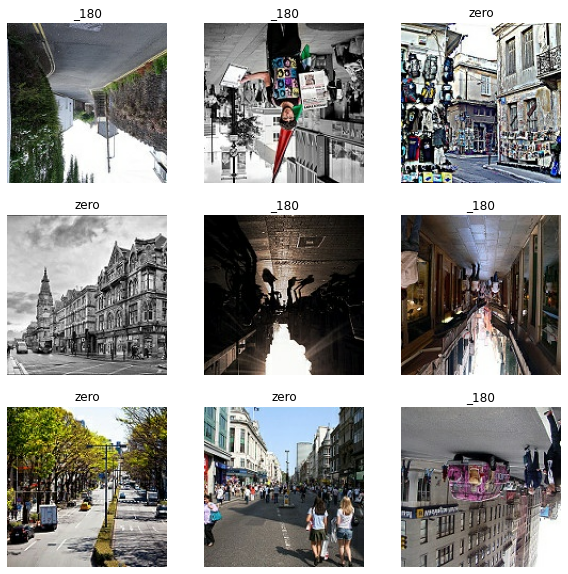

In [8]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [10]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 30
Number of test batches: 7


In [11]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [12]:
!git clone https://github.com/ozi-forks/Keras-VGG16-places365


Cloning into 'Keras-VGG16-places365'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 175 (delta 0), reused 0 (delta 0), pack-reused 172
Receiving objects: 100% (175/175), 447.97 KiB | 1.93 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [13]:
os.chdir("/kaggle/working/")

In [14]:
os.chdir("./Keras-VGG16-places365/")
from vgg16_places_365 import VGG16_Places365
os.chdir("/kaggle/working/")

In [15]:
base_model = VGG16_Places365(weights='places', include_top=False)
base_model.trainable = False

58925056/58909656 [==============================] - 3s 0us/step


In [16]:
# IMG_SHAPE = IMG_SIZE + (3,)
# from keras.applications.vgg16 import VGG16
# base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False, weights='imagenet')
# base_model.trainable = False

In [17]:
base_model.summary()

Model: "vgg16-places365"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128

In [18]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

2022-04-04 10:41:12.844749: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


(32, 4, 4, 512)


In [19]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [20]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [21]:
inputs = tf.keras.Input(shape=(150, 150, 3))
# x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [22]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 150, 150, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 150, 150, 3)       0         
_________________________________________________________________
vgg16-places365 (Functional) (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513   

In [24]:
initial_epochs = 25

loss0, accuracy0 = model.evaluate(validation_dataset)

30/30 [==============================] - 3s 43ms/step - loss: 2.4152 - accuracy: 0.5910


In [25]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.42
initial accuracy: 0.59


In [26]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/25
55/55 [==============================] - 4s 61ms/step - loss: 2.6784 - accuracy: 0.5911 - val_loss: 1.7866 - val_accuracy: 0.6771
Epoch 2/25
55/55 [==============================] - 3s 60ms/step - loss: 2.1007 - accuracy: 0.6622 - val_loss: 1.4678 - val_accuracy: 0.7244
Epoch 3/25
55/55 [==============================] - 3s 59ms/step - loss: 1.8104 - accuracy: 0.6935 - val_loss: 1.2282 - val_accuracy: 0.7729
Epoch 4/25
55/55 [==============================] - 3s 60ms/step - loss: 1.5148 - accuracy: 0.7386 - val_loss: 1.1015 - val_accuracy: 0.7955
Epoch 5/25
55/55 [==============================] - 3s 60ms/step - loss: 1.3474 - accuracy: 0.7611 - val_loss: 0.9429 - val_accuracy: 0.8407
Epoch 6/25
55/55 [==============================] - 3s 60ms/step - loss: 1.1860 - accuracy: 0.8022 - val_loss: 0.8478 - val_accuracy: 0.8590
Epoch 7/25
55/55 [==============================] - 3s 59ms/step - loss: 1.0726 - accuracy: 0.8265 - val_loss: 0.7903 - val_accuracy: 0.8676
Epoch 8/25
55

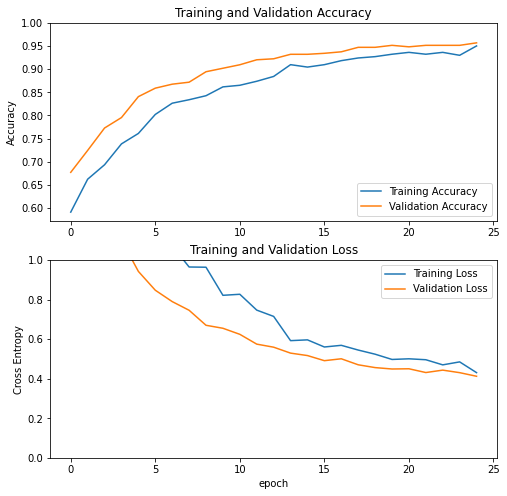

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [28]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

7/7 [==============================] - 0s 43ms/step - loss: 0.3731 - accuracy: 0.9554
Test accuracy : 0.9553571343421936


Predictions:
 [1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0]
Labels:
 [1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0]


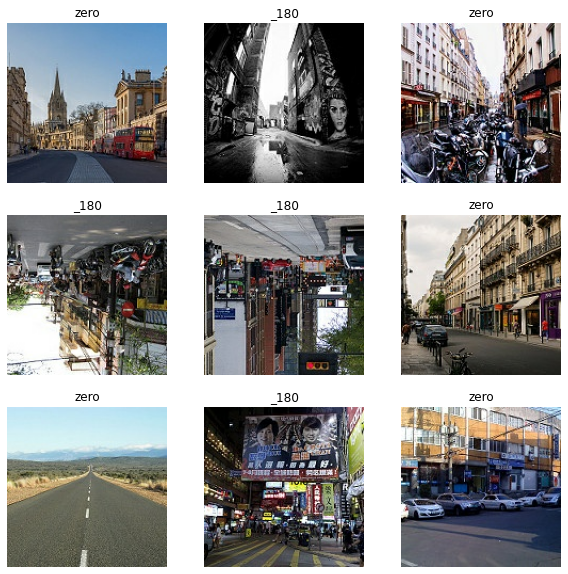

In [29]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

In [30]:
model.save('./model')


2022-04-04 10:43:09.828376: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
